# Lecture 1 — Deep Learning Foundations: From Differentiable Functions to Neural Networks

Welcome to **Lecture 1** of *Introduction to Deep Learning*!  
This lecture is part of the **SAIR ML/DL Roadmap & Bootcamp**.

## 🎯 Learning Philosophy: First Principles Approach

> "If you can't implement it from scratch, you don't truly understand it."

In this lecture, we'll build deep learning from the ground up:
- 🧮 **Mathematical Foundations**: Differentiable functions, gradients, chain rule
- ⚙️ **Computational Implementation**: NumPy implementations from scratch
- 🔬 **Intuitive Understanding**: Visualizations and step-by-step explanations
- 🚀 **Practical Applications**: Real datasets and comparisons

## 🧩 Core Analogy: Deep Learning as LEGO Blocks

Think of neural networks as **snapping together differentiable LEGO blocks**:
- Each layer is a different colored block
- Forward pass = building the structure
- Backward pass = figuring out which blocks to adjust
- Training = making the structure better over time

## 📚 Prerequisites Recap

From previous lectures, we've built:
- ✅ **Linear Regression** from scratch
- ✅ **Logistic Regression** from scratch  
- ✅ **Softmax Regression** from scratch
- ✅ **Gradient Descent** optimization

Today, we'll extend these concepts to build **neural networks**!

# Part 1: Mathematical Foundations — Differentiable Computation

## 🧮 Core Concept: Everything is a Differentiable Function

Deep learning is fundamentally about **composing differentiable functions** and **optimizing them via gradient descent**.

### What Makes a Function "Learnable"?

A function is learnable if:
1. **It's differentiable** (we can compute gradients)
2. **It has parameters** (weights we can adjust)
3. **It minimizes some objective** (loss function)

Let's start with the simplest differentiable function...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
import seaborn as sns

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


# Understanding Functions, Slopes, and Why Neural Networks Need Derivatives

To understand how **neural networks learn**, we must understand **derivatives**.

We'll start with a simple function:

$
f(x) = 3x^2 - 4x + 5
$

This will help us build intuition for:

- What a derivative is  
- How to approximate it numerically  
- Why neural networks depend heavily on derivatives (backpropagation)


In [ ]:
def f(x):
    return 3*x**2 - 4*x + 5

# Evaluate at a sample point
f(3.0)


20.0

## Visualizing the Function

To understand how the function behaves, we plot it.

A derivative describes **how steep** this curve is at any point.


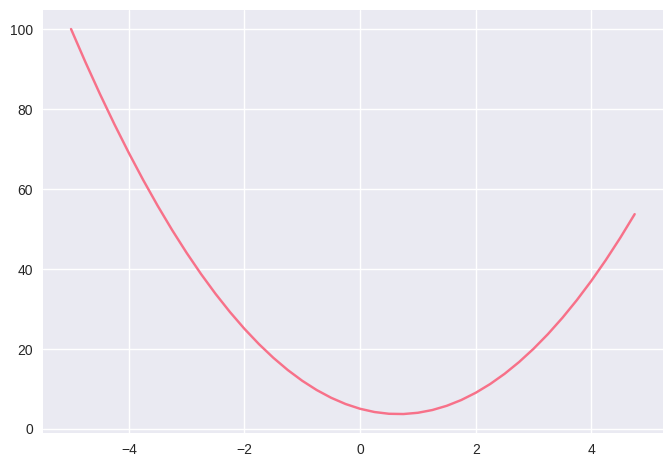

In [ ]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

## What Is a Derivative?

The derivative measures the **slope** of the function at a point.

The slope at a point `x` can be approximated using:

$
f'(x) \approx \frac{f(x+h) - f(x)}{h}
$

This tells us:  
👉 *If I move a tiny bit in x, how much does f(x) change?*

This is exactly what neural networks need during training —  
**How does changing a weight affect the loss?**


In [ ]:
h = 1e-6
x = 2/3

numerical_derivative = (f(x + h) - f(x)) / h
numerical_derivative


2.999378523327323e-06

## Why Isn't the Derivative Exactly Zero?

The true derivative of:

$
f(x) = 3x^2 - 4x + 5
$

is:

$
f'(x) = 6x - 4
$

At $ x = \frac{2}{3} $:

$
f'(2/3) = 0
$

But our numerical estimate produces a tiny value like:2.9e-06


This happens because of:

- **Floating-point rounding errors**
- **Using a very small h**
- **Subtraction of nearly equal numbers**

This is normal and a great introduction to why **computers approximate derivatives**, just like neural networks.


# How This Motivates Neural Networks

Neural networks learn by adjusting weights to reduce loss:

To know how to update each weight, the network needs the slope:

This is just a **derivative**.

But a neural network has:

- millions of parameters  
- deeply nested functions  
- non-linear activations  
- matrix multiplications  

We cannot compute derivatives manually.

### ✔ Backpropagation = Automatic Derivatives  
Neural networks use the **chain rule** (applied efficiently) to compute all derivatives:

This is exactly what PyTorch / TensorFlow / JAX do under the hood.

### Why our example matters  
You just saw:

- a function  
- its slope  
- numerical approximation  
- floating-point issues  

These same ideas power:

- Gradient Descent  
- Backpropagation  
- Training deep networks  

Derivatives = Learning.  
No derivatives → No neural networks.


# Mathematical Derivation of Linear Layer Gradients

## Forward Pass
```python
def __call__(self, X):
    return X @ self.W + self.b
```

**Mathematical Form:**
$
\mathbf{Y} = \mathbf{X}\mathbf{W} + \mathbf{b}
$

**Dimensions:**
- $\mathbf{X} \in \mathbb{R}^{m \times n}$ (input: $m$ samples, $n$ features)
- $\mathbf{W} \in \mathbb{R}^{n \times p}$ (weight matrix)
- $\mathbf{b} \in \mathbb{R}^{1 \times p}$ (bias vector, broadcasted)
- $\mathbf{Y} \in \mathbb{R}^{m \times p}$ (output)

---

## Backward Pass - Gradient Computations

### 1. Gradient for Weights $\left(\frac{\partial L}{\partial \mathbf{W}}\right)$
```python
dL_dW = X.T @ dL_doutput
```

**Derivation:**
$
\frac{\partial L}{\partial \mathbf{W}} = \frac{\partial L}{\partial \mathbf{Y}} \cdot \frac{\partial \mathbf{Y}}{\partial \mathbf{W}}
$

Since $\mathbf{Y} = \mathbf{X}\mathbf{W}$, the derivative is:
$
\frac{\partial \mathbf{Y}}{\partial \mathbf{W}} = \mathbf{X}^T
$

**Final Result:**
$
\frac{\partial L}{\partial \mathbf{W}} = \mathbf{X}^T \frac{\partial L}{\partial \mathbf{Y}}
$

---

### 2. Gradient for Bias $\left(\frac{\partial L}{\partial \mathbf{b}}\right)$
```python
dL_db = np.sum(dL_doutput, axis=0, keepdims=True)
```

**Derivation:**
For bias term $\mathbf{b}$ (broadcasted across samples):
$
\frac{\partial L}{\partial \mathbf{b}} = \sum_{i=1}^{m} \frac{\partial L}{\partial \mathbf{Y}_i}
$

Where the sum is over all $m$ samples in the batch.

---

### 3. Gradient for Inputs $\left(\frac{\partial L}{\partial \mathbf{X}}\right)$
```python
dL_dX = dL_doutput @ self.W.T
```

**Derivation:**
$
\frac{\partial L}{\partial \mathbf{X}} = \frac{\partial L}{\partial \mathbf{Y}} \cdot \frac{\partial \mathbf{Y}}{\partial \mathbf{X}}
$

Since $\mathbf{Y} = \mathbf{X}\mathbf{W}$, the derivative is:
$
\frac{\partial \mathbf{Y}}{\partial \mathbf{X}} = \mathbf{W}^T
$

**Final Result:**
$
\frac{\partial L}{\partial \mathbf{X}} = \frac{\partial L}{\partial \mathbf{Y}} \mathbf{W}^T
$

---

## Example with Concrete Numbers

**Given:**
```
X = [[1.0, 2.0, 3.0]]    # Shape: (1×3)
W = random 3×2 matrix    # Shape: (3×2)  
b = zeros 1×2           # Shape: (1×2)
dL_doutput = [[0.1, -0.2]]  # Shape: (1×2)
```

### Forward Pass:
$\mathbf{Y} = \mathbf{X}\mathbf{W} + \mathbf{b} = \begin{bmatrix}1 & 2 & 3\end{bmatrix} \mathbf{W} + \begin{bmatrix}0 & 0\end{bmatrix}$

### Backward Pass:
- **Weight Gradient:**
    $\frac{\partial L}{\partial \mathbf{W}} = \mathbf{X}^T \frac{\partial L}{\partial \mathbf{Y}} = \begin{bmatrix}1 \\ 2 \\ 3\end{bmatrix} \begin{bmatrix}0.1 & -0.2\end{bmatrix}$

- **Bias Gradient:**
  $\frac{\partial L}{\partial \mathbf{b}} = \text{sum}\left(\begin{bmatrix}0.1 & -0.2\end{bmatrix}\right) = \begin{bmatrix}0.1 & -0.2\end{bmatrix}$

- **Input Gradient:**
  $\frac{\partial L}{\partial \mathbf{X}} = \frac{\partial L}{\partial \mathbf{Y}} \mathbf{W}^T = \begin{bmatrix}0.1 & -0.2\end{bmatrix} \mathbf{W}^T$

---

## Gradient Descent Update Rule

These gradients enable parameter learning via gradient descent:

$\mathbf{W} \leftarrow \mathbf{W} - \alpha \frac{\partial L}{\partial \mathbf{W}}$

$\mathbf{b} \leftarrow \mathbf{b} - \alpha \frac{\partial L}{\partial \mathbf{b}}$

Where $\alpha$ is the learning rate.

The input gradient $\frac{\partial L}{\partial \mathbf{X}}$ enables **backpropagation** through deeper networks by passing gradients to previous layers.

In [ ]:
class DifferentiableLinear:
    """The simplest differentiable function: linear transformation"""
    
    def __init__(self, input_dim, output_dim):
        # Initialize parameters (the "learnable" part)
        self.W = np.random.randn(input_dim, output_dim) * 0.1 # later 
        self.b = np.zeros((1, output_dim))
        
    def __call__(self, X):
        """Forward pass: compute output"""
        return X @ self.W + self.b
    
    def gradients(self, X, dL_doutput):
        """Compute gradients w.r.t parameters"""
        dL_dW = X.T @ dL_doutput  # Gradient for weights
        dL_db = np.sum(dL_doutput, axis=0, keepdims=True)  # Gradient for bias
        dL_dX = dL_doutput @ self.W.T  # Gradient for inputs (for chaining)
        
        return dL_dW, dL_db, dL_dX

# Demonstrate the differentiable function
print("🧮 Differentiable Linear Function Demo:")
linear_fn = DifferentiableLinear(4, 2)
X_sample = np.array([[1.0, 2.0, 3.0, 4.0]]) # (1, 3) * (3, 2) = (1, 2)
output = linear_fn(X_sample)
print(f"Input X: {X_sample}")
print(f"Weights W: {linear_fn.W}")
print(f"Bias b: {linear_fn.b}")
print(f"Output: {output}")

# Compute gradients
dL_doutput = np.array([[0.1, -0.2]])  # Mock gradient from loss
dL_dW, dL_db, dL_dX = linear_fn.gradients(X_sample, dL_doutput)
print(f"\nGradient for W: {dL_dW}")
print(f"Gradient for b: {dL_db}")
print(f"Gradient for X: {dL_dX}")

🧮 Differentiable Linear Function Demo:
Input X: [[1. 2. 3. 4.]]
Weights W: [[-0.0736753   0.13816886]
 [ 0.00576961 -0.13429479]
 [ 0.14045014 -0.06018018]
 [ 0.16299858  0.04000307]]
Bias b: [[0. 0.]]
Output: [[ 1.01120866 -0.150949  ]]

Gradient for W: [[ 0.1 -0.2]
 [ 0.2 -0.4]
 [ 0.3 -0.6]
 [ 0.4 -0.8]]
Gradient for b: [[ 0.1 -0.2]]
Gradient for X: [[-0.0350013   0.02743592  0.02608105  0.00829924]]


## 🔗 Function Composition: The Key to Deep Learning

**Deep learning = Composing differentiable functions + Chain rule**

### 🧩 The LEGO Block Analogy
- Each function is a LEGO block
- Forward pass = snapping blocks together
- Backward pass = figuring out which blocks to adjust
- Chain rule = passing adjustment information between blocks

If $f(x)$ and $g(x)$ are differentiable, then:
$$h(x) = g(f(x))$$
$$\frac{dh}{dx} = \frac{dg}{df} \cdot \frac{df}{dx}$$

Let's build our first composition: **Linear + Activation**

In [ ]:
class DifferentiableReLU:
    """Differentiable ReLU activation function"""
    
    def __call__(self, X):
        """Forward pass: ReLU(X) = max(0, X)"""
        self.input = X  # Store for backward pass
        return np.maximum(0, X)
    
    def gradients(self, dL_doutput):
        """Backward pass: gradient of ReLU"""
        dL_dinput = dL_doutput * (self.input > 0).astype(float)
        return dL_dinput

# Demonstrate function composition
print("🔗 Function Composition Demo:")
linear = DifferentiableLinear(2, 3)
activation = DifferentiableReLU()

X_sample = np.array([[1.0, -1.0]])

# Forward pass: composition
z = linear(X_sample)
a = activation(z)
print(f"Input: {X_sample}")
print(f"Linear output (z): {z}")
print(f"ReLU output (a): {a}")

# Backward pass: chain rule
dL_da = np.array([[0.1, 0.2, -0.1]])  # Mock gradient
dL_dz = activation.gradients(dL_da)
dL_dW, dL_db, dL_dX = linear.gradients(X_sample, dL_dz)

print(f"\n🔁 Backward Pass (Chain Rule):")
print(f"dL/da: {dL_da}")
print(f"dL/dz: {dL_dz}")
print(f"dL/dW: {dL_dW}")
print(f"dL/dX: {dL_dX}")

🔗 Function Composition Demo:
Input: [[ 1. -1.]]
Linear output (z): [[-0.01987266  0.0553057   0.13054641]]
ReLU output (a): [[0.         0.0553057  0.13054641]]

🔁 Backward Pass (Chain Rule):
dL/da: [[ 0.1  0.2 -0.1]]
dL/dz: [[ 0.   0.2 -0.1]]
dL/dW: [[ 0.   0.2 -0.1]
 [ 0.  -0.2  0.1]]
dL/dX: [[0.0029932  0.00498671]]


# 🚀 Motivating Deep Learning: Solving Non-Linear Problems

## 📋 Problem Statement: The Limitation of Linear Models

Let's explore why we need deep learning by first understanding what happens when traditional machine learning models encounter complex, non-linear data.




In [ ]:
from sklearn.datasets import make_moons, make_circles

# Create non-linearly separable datasets
np.random.seed(42)

# Moons dataset
X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)
y_moons = y_moons.reshape(-1, 1)

# Circles dataset  
X_circles, y_circles = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)
y_circles = y_circles.reshape(-1, 1)



## 🔍 Visualizing the Challenge

/tmp/ipykernel_392068/2038297749.py:22: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_392068/2038297749.py:22: UserWarning: Glyph 11093 (\N{HEAVY LARGE CIRCLE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11093 (\N{HEAVY LARGE CIRCLE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


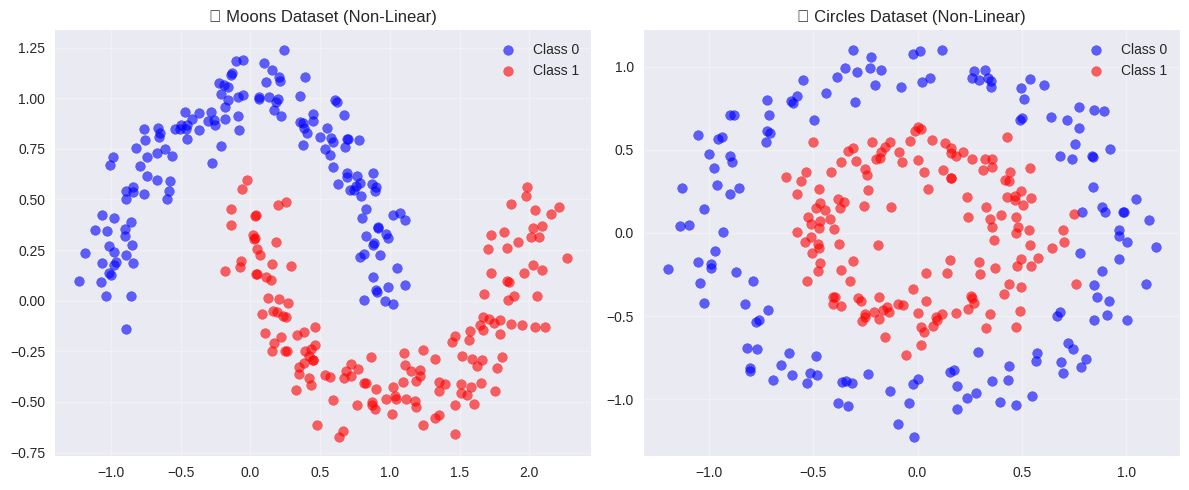

In [ ]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Moons
axes[0].scatter(X_moons[y_moons.flatten() == 0, 0], X_moons[y_moons.flatten() == 0, 1], 
                color='blue', label='Class 0', alpha=0.6)
axes[0].scatter(X_moons[y_moons.flatten() == 1, 0], X_moons[y_moons.flatten() == 1, 1], 
                color='red', label='Class 1', alpha=0.6)
axes[0].set_title('🌙 Moons Dataset (Non-Linear)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Circles
axes[1].scatter(X_circles[y_circles.flatten() == 0, 0], X_circles[y_circles.flatten() == 0, 1], 
                color='blue', label='Class 0', alpha=0.6)
axes[1].scatter(X_circles[y_circles.flatten() == 1, 0], X_circles[y_circles.flatten() == 1, 1], 
                color='red', label='Class 1', alpha=0.6)
axes[1].set_title('⭕ Circles Dataset (Non-Linear)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Observation**: Both datasets are clearly **non-linearly separable** - you can't draw a straight line to separate the classes!


## 🧪 Traditional Approach: Logistic Regression (YOU SHOULD BE FAMILAIR WITH THE FOLLOWING CODE)

Let's see how a traditional linear model performs:



In [ ]:

class LogisticRegression:
    def __init__(self, n_features, lr=0.01):
        """
        Initialize Logistic Regression model
        
        Args:
            n_features: number of input features
            lr: learning rate
        """
        self.W = np.random.randn(n_features, 1) * 0.01
        self.b = np.zeros((1, 1))
        self.lr = lr
        self.losses = []
        self.accuracies = []
    
    def sigmoid(self, z):
        """Sigmoid activation function"""
        # Clip to prevent overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def forward(self, X):
        """
        Forward pass: compute predictions
        
        Args:
            X: input features (m, n)
        
        Returns:
            predictions: probabilities (m, 1)
        """
        z = X @ self.W + self.b
        return self.sigmoid(z)
    
    def compute_loss(self, y_pred, y_true):
        """
        Compute Binary Cross-Entropy loss
        
        Args:
            y_pred: predicted probabilities (m, 1)
            y_true: true labels (m, 1)
        
        Returns:
            loss: scalar BCE loss
        """
        # Clip predictions to prevent log(0)
        y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        m = len(y_true)
        loss = -np.mean(
            y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)
        )
        return loss
    
    def compute_accuracy(self, y_pred, y_true):
        """
        Compute classification accuracy
        
        Args:
            y_pred: predicted probabilities (m, 1)
            y_true: true labels (m, 1)
        
        Returns:
            accuracy: percentage of correct predictions
        """
        predictions = (y_pred >= 0.5).astype(int)
        return np.mean(predictions == y_true) * 100
    
    def backward(self, X, y_pred, y_true):
        """
        Compute gradients
        
        Args:
            X: input features (m, n)
            y_pred: predicted probabilities (m, 1)
            y_true: true labels (m, 1)
        
        Returns:
            dW: gradient w.r.t weights
            db: gradient w.r.t bias
        """
        m = len(y_true)
        dW = (1/m) * (X.T @ (y_pred - y_true))
        db = (1/m) * np.sum(y_pred - y_true)
        return dW, db
    
    def step(self, dW, db):
        """Update parameters"""
        self.W -= self.lr * dW
        self.b -= self.lr * db
    
    def fit(self, X, y, epochs=1000, verbose=True):
        """
        Train the model
        
        Args:
            X: training features (m, n)
            y: training labels (m, 1)
            epochs: number of training iterations
            verbose: whether to print progress
        """
        for i in range(epochs):
            # Forward pass
            y_pred = self.forward(X)
            
            # Compute loss and accuracy
            loss = self.compute_loss(y_pred, y)
            acc = self.compute_accuracy(y_pred, y)
            
            self.losses.append(loss)
            self.accuracies.append(acc)
            
            # Backward pass
            dW, db = self.backward(X, y_pred, y)
            
            # Update parameters
            self.step(dW, db)
            
            if verbose and (i % 100 == 0 or i == epochs - 1):
                print(f"Epoch {i:4d} | Loss: {loss:.4f} | Accuracy: {acc:.2f}%")
    
    def predict(self, X):
        """
        Make predictions on new data
        
        Args:
            X: input features (m, n)
        
        Returns:
            predictions: binary predictions (m, 1)
        """
        y_pred = self.forward(X)
        return (y_pred >= 0.5).astype(int)
    
    def predict_proba(self, X):
        """
        Get probability predictions
        
        Args:
            X: input features (m, n)
        
        Returns:
            probabilities: predicted probabilities (m, 1)
        """
        return self.forward(X)

# 🚀 Motivating Deep Learning: Solving Non-Linear Problems

## 📋 Problem Statement: The Limitation of Linear Models

Let's explore why we need deep learning by first understanding what happens when traditional machine learning models encounter complex, non-linear data.


In [ ]:
## 🎯 Testing Logistic Regression on Non-Linear Data
# Try logistic regression on moons dataset
linear_model = LogisticRegression(n_features=2, lr=0.1)
linear_model.fit(X_moons, y_moons, epochs=1000, verbose=False)

# Evaluate
y_pred = linear_model.predict(X_moons)
accuracy = linear_model.compute_accuracy(linear_model.forward(X_moons), y_moons)

print(f"📊 Logistic Regression on Moons Dataset:")
print(f"Accuracy: {accuracy:.2f}%")

📊 Logistic Regression on Moons Dataset:
Accuracy: 86.67%


In [ ]:

## 🎯 Testing Logistic Regression on Non-Linear Data
# Try logistic regression on circle dataset
linear_model2 = LogisticRegression(n_features=2, lr=0.1)
linear_model2.fit(X_circles, y_circles, epochs=1000, verbose=False)

# Evaluate
y_pred = linear_model2.predict(X_circles)
accuracy = linear_model2.compute_accuracy(linear_model2.forward(X_circles), y_circles)

print(f"📊 Logistic Regression on circle Dataset:")
print(f"Accuracy: {accuracy:.2f}%")

📊 Logistic Regression on circle Dataset:
Accuracy: 49.67%


## 📈 Visualizing the Linear Decision Boundary


/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


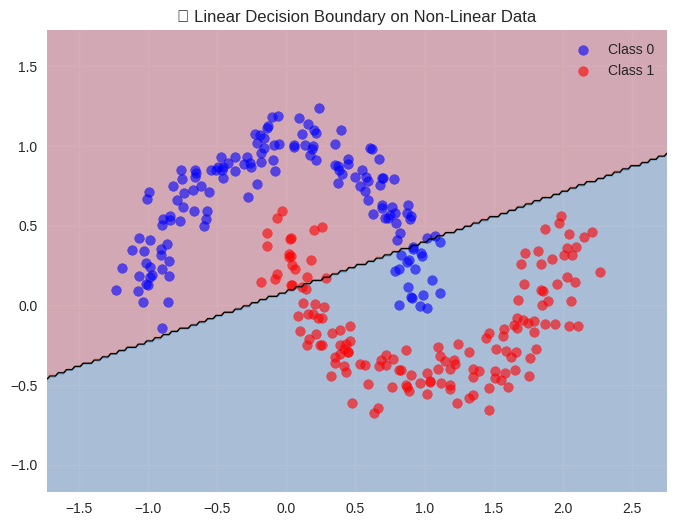

In [ ]:



def plot_decision_boundary_linear(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
    plt.contour(xx, yy, Z, colors='black', linewidths=1, levels=[0.5])
    
    plt.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1], 
                color='blue', label='Class 0', alpha=0.6)
    plt.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1], 
                color='red', label='Class 1', alpha=0.6)
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

plot_decision_boundary_linear(linear_model, X_moons, y_moons, 
                            "❌ Linear Decision Boundary on Non-Linear Data")


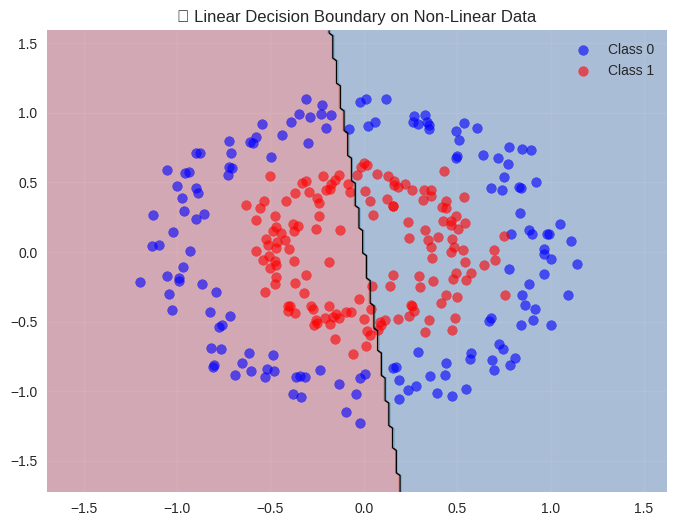

In [ ]:
plot_decision_boundary_linear(linear_model2, X_circles, y_circles, 
                            "❌ Linear Decision Boundary on Non-Linear Data")

## 🎭 Activation Functions: The Source of Non-Linearity

Activation functions determine the **non-linear transformation** applied to each neuron's output.

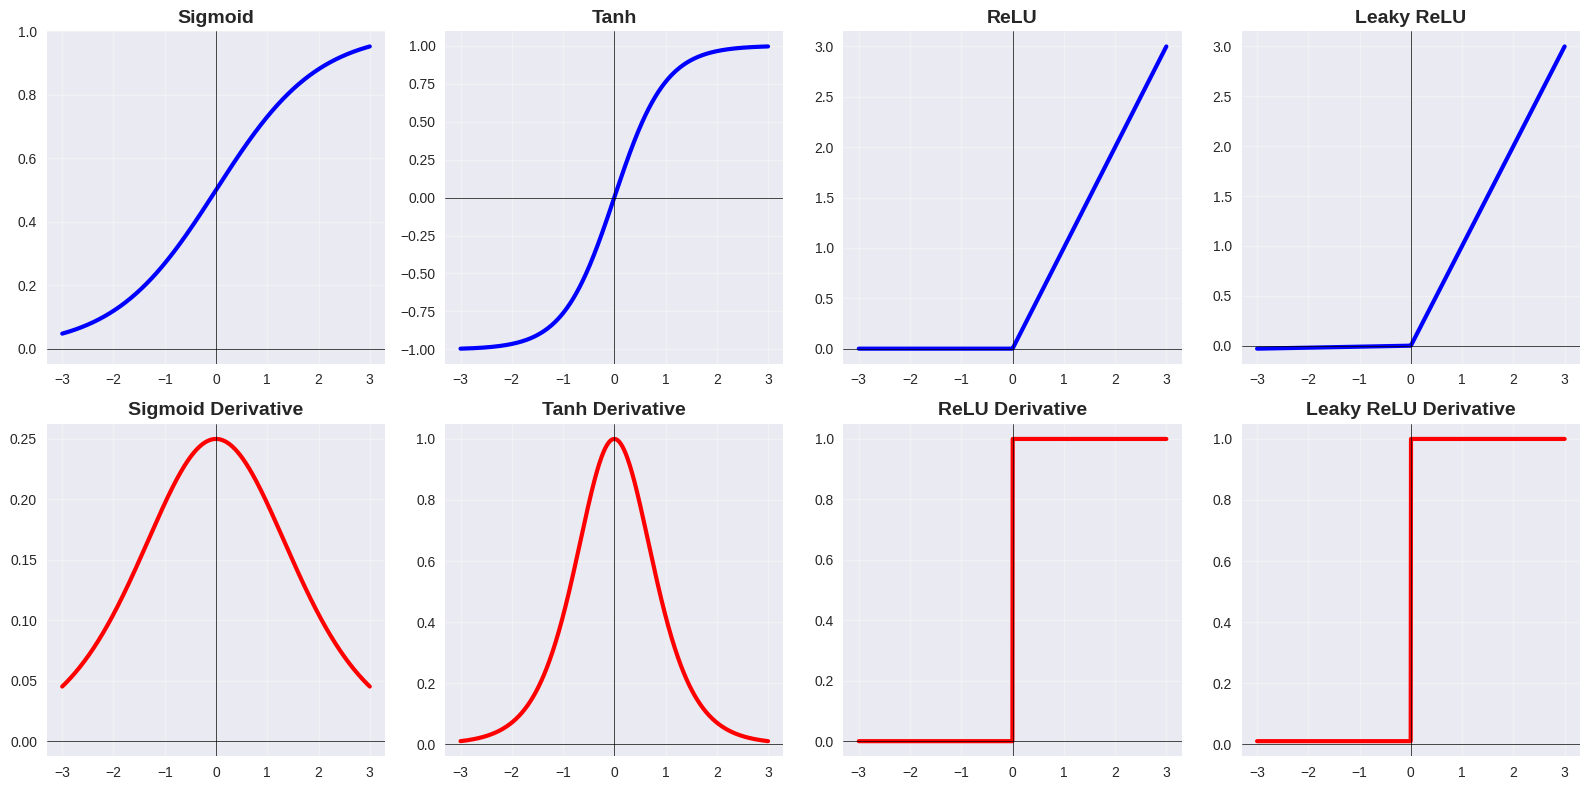


📊 Activation Function Properties:
• Sigmoid: Range: (0,1), Smooth, Vanishing gradients
• Tanh: Range: (-1,1), Zero-centered, Vanishing gradients
• ReLU: Range: [0,∞), Computationally efficient, Dying ReLU
• Leaky ReLU: Range: (-∞,∞), Prevents dying neurons, Small negative slope


In [ ]:
# Comprehensive activation function analysis
x = np.linspace(-3, 3, 1000)

activations = {
    'Sigmoid': (lambda x: 1/(1+np.exp(-x)), lambda x: (1/(1+np.exp(-x)))*(1-1/(1+np.exp(-x)))),
    'Tanh': (np.tanh, lambda x: 1-np.tanh(x)**2),
    'ReLU': (lambda x: np.maximum(0,x), lambda x: (x>0).astype(float)),
    'Leaky ReLU': (lambda x: np.where(x>0, x, 0.01*x), lambda x: np.where(x>0, 1, 0.01))
}

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for idx, (name, (func, deriv)) in enumerate(activations.items()):
    # Activation function
    axes[0, idx].plot(x, func(x), 'b-', linewidth=3, label=f'{name}')
    axes[0, idx].set_title(f'{name}', fontsize=14, weight='bold')
    axes[0, idx].grid(True, alpha=0.3)
    axes[0, idx].axhline(0, color='black', linewidth=0.5)
    axes[0, idx].axvline(0, color='black', linewidth=0.5)
    
    # Derivative
    axes[1, idx].plot(x, deriv(x), 'r-', linewidth=3, label=f'd{name}/dx')
    axes[1, idx].set_title(f'{name} Derivative', fontsize=14, weight='bold')
    axes[1, idx].grid(True, alpha=0.3)
    axes[1, idx].axhline(0, color='black', linewidth=0.5)
    axes[1, idx].axvline(0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

print("\n📊 Activation Function Properties:")
properties = {
    'Sigmoid': 'Range: (0,1), Smooth, Vanishing gradients',
    'Tanh': 'Range: (-1,1), Zero-centered, Vanishing gradients', 
    'ReLU': 'Range: [0,∞), Computationally efficient, Dying ReLU',
    'Leaky ReLU': 'Range: (-∞,∞), Prevents dying neurons, Small negative slope'
}

for name, props in properties.items():
    print(f"• {name}: {props}")

# Part 2: The Need for Non-Linearity

## 🎯 Why Linear Models Fail on Complex Data

Linear models can only learn **linear decision boundaries**. Many real-world problems require **non-linear boundaries**.

In [ ]:
# Demonstrate why we need non-linear activations
print("🔍 MATHEMATICAL PROOF: Without Activation = Linear Model")

# Create a simple 2-layer "network" without activations
X = np.array([[1.0, 2.0]])
W1 = np.array([[0.5, -0.2], [0.1, 0.3]])  # Layer 1 weights
W2 = np.array([[0.8], [-0.5]])            # Layer 2 weights
b1 = np.array([[0.1, -0.1]])              # Layer 1 bias  
b2 = np.array([[0.2]])                    # Layer 2 bias

print(f"Input X: {X}")
print(f"Layer 1 weights W1: {W1}")
print(f"Layer 2 weights W2: {W2}")

# Without activation functions (just linear transformations)
z1 = X @ W1 + b1  # Layer 1 output (linear)
print(f"\nLayer 1 output (linear): {z1}")

z2 = z1 @ W2 + b2  # Final output (linear)
print(f"Final output (linear): {z2}")

# Now let's see what happens mathematically
# The entire network becomes: output = X @ W1 @ W2 + (b1 @ W2 + b2)
W_combined = W1 @ W2
b_combined = b1 @ W2 + b2
output_combined = X @ W_combined + b_combined

print(f"\n🧠 CRITICAL INSIGHT:")
print(f"Combined weights W1@W2: {W_combined.flatten()}")
print(f"Combined bias: {b_combined.flatten()}")
print(f"Direct computation X@(W1@W2) + b_combined: {output_combined.flatten()}")
print(f"Same as layer-by-layer: {z2.flatten()}")

print("\n🚨 CONCLUSION: Multiple linear layers = Single linear layer!")
print("No matter how many layers, without activations → still linear!")

🔍 MATHEMATICAL PROOF: Without Activation = Linear Model
Input X: [[1. 2.]]
Layer 1 weights W1: [[ 0.5 -0.2]
 [ 0.1  0.3]]
Layer 2 weights W2: [[ 0.8]
 [-0.5]]

Layer 1 output (linear): [[0.8 0.3]]
Final output (linear): [[0.69]]

🧠 CRITICAL INSIGHT:
Combined weights W1@W2: [ 0.5  -0.07]
Combined bias: [0.33]
Direct computation X@(W1@W2) + b_combined: [0.69]
Same as layer-by-layer: [0.69]

🚨 CONCLUSION: Multiple linear layers = Single linear layer!
No matter how many layers, without activations → still linear!


## 🧠 Biological Inspiration: The Neuron as a Computational Unit

**Biological Neuron → Artificial Neuron**
- Dendrites (inputs) → Input features
- Cell body (processing) → Weighted sum + Activation
- Axon (output) → Prediction
- Synapses (connections) → Weights

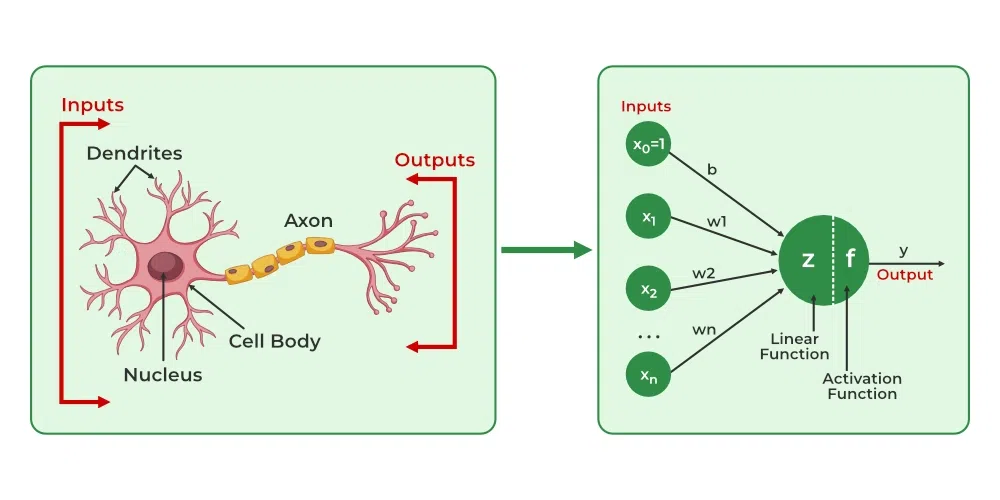

In [ ]:
class Neuron:
    """A single artificial neuron (perceptron)"""
    
    def __init__(self, n_inputs, activation='sigmoid'):
        self.W = np.random.randn(n_inputs, 1) * 0.1 
        self.b = np.zeros((1, 1))
        self.activation = activation
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -250, 250)))
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def forward(self, X):
        """Forward pass: inputs → weighted sum → activation → output"""
        self.X = X  # Store inputs
        self.z = X @ self.W + self.b  # Weighted sum
        
        if self.activation == 'sigmoid':
            self.a = self.sigmoid(self.z)
        elif self.activation == 'relu':
            self.a = self.relu(self.z)
        elif self.activation == 'linear':
            self.a = self.z
            
        return self.a
    
    def backward(self, dL_da):
        """Backward pass: compute gradients"""
        if self.activation == 'sigmoid':
            da_dz = self.a * (1 - self.a)  # sigmoid derivative
        elif self.activation == 'relu':
            da_dz = (self.z > 0).astype(float)
        elif self.activation == 'linear':
            da_dz = 1.0
            
        dL_dz = dL_da * da_dz  # Chain rule
        dL_dW = self.X.T @ dL_dz
        dL_db = np.sum(dL_dz, axis=0, keepdims=True)
        dL_dX = dL_dz @ self.W.T
        
        return dL_dW, dL_db, dL_dX


In [ ]:
# Demonstrate single neuron
print("🧠 Single Artificial Neuron Demo:")
neuron = Neuron(3, activation='sigmoid')
X_sample = np.array([[0.5, -1.2, 0.8]])

output = neuron.forward(X_sample)
print(f"Input: {X_sample}")
print(f"Weights: {neuron.W.flatten()}")
print(f"Bias: {neuron.b[0,0]}")
print(f"Weighted sum (z): {neuron.z[0,0]:.4f}")
print(f"Activation output (a): {output[0,0]:.4f}")

# Backward pass
dL_da = np.array([[-0.1]])
dL_dW, dL_db, dL_dX = neuron.backward(dL_da)
print(f"\nGradients:")
print(f"dL/dW: {dL_dW.flatten()}")
print(f"dL/db: {dL_db[0,0]:.4f}")
print(f"dL/dX: {dL_dX.flatten()}")

🧠 Single Artificial Neuron Demo:
Input: [[ 0.5 -1.2  0.8]]
Weights: [-0.02341534 -0.0234137   0.15792128]
Bias: 0.0
Weighted sum (z): 0.1427
Activation output (a): 0.5356

Gradients:
dL/dW: [-0.01243656  0.02984774 -0.01989849]
dL/db: -0.0249
dL/dX: [ 0.00058241  0.00058237 -0.00392799]


# Part 3: Building Neural Networks Layer by Layer

## 🏗️ From Single Neuron to Neural Layer

A neural layer is just **multiple neurons in parallel**!

In [ ]:
class DenseLayer:
    """A dense (fully-connected) neural network layer"""
    
    def __init__(self, n_inputs, n_neurons, activation='relu'):
            
        self.W = np.random.randn(n_inputs, n_neurons) * 0.1
        self.b = np.zeros((1, n_neurons))
        self.activation = activation
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -250, 250)))
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def tanh(self, x):
        return np.tanh(x)
    
    def forward(self, X):
        """Forward pass through the layer"""
        self.X = X
        self.z = X @ self.W + self.b
        
        if self.activation == 'sigmoid':
            self.a = self.sigmoid(self.z)
        elif self.activation == 'relu':
            self.a = self.relu(self.z)
        elif self.activation == 'tanh':
            self.a = self.tanh(self.z)
        elif self.activation == 'linear':
            self.a = self.z
            
        return self.a
    
    def backward(self, dL_da):
        """Backward pass through the layer"""
        # Activation derivative
        if self.activation == 'sigmoid':
            da_dz = self.a * (1 - self.a)
        elif self.activation == 'relu':
            da_dz = (self.z > 0).astype(float)
        elif self.activation == 'tanh':
            da_dz = 1 - self.a**2
        elif self.activation == 'linear':
            da_dz = 1.0
        
        dL_dz = dL_da * da_dz
        dL_dW = self.X.T @ dL_dz
        dL_db = np.sum(dL_dz, axis=0, keepdims=True)
        dL_dX = dL_dz @ self.W.T
        
        return dL_dW, dL_db, dL_dX


🏗️ Neural Layer Demo:
Input shape: (2, 3)
Weight shape: (3, 5)
Output shape: (2, 5)

Input:
[[ 1.  -0.5  2. ]
 [ 0.5  1.5 -1. ]]

Output (after ReLU):
[[0.12749483 0.         0.         0.27490236 0.        ]
 [0.04324134 0.         0.         0.         0.        ]]


/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


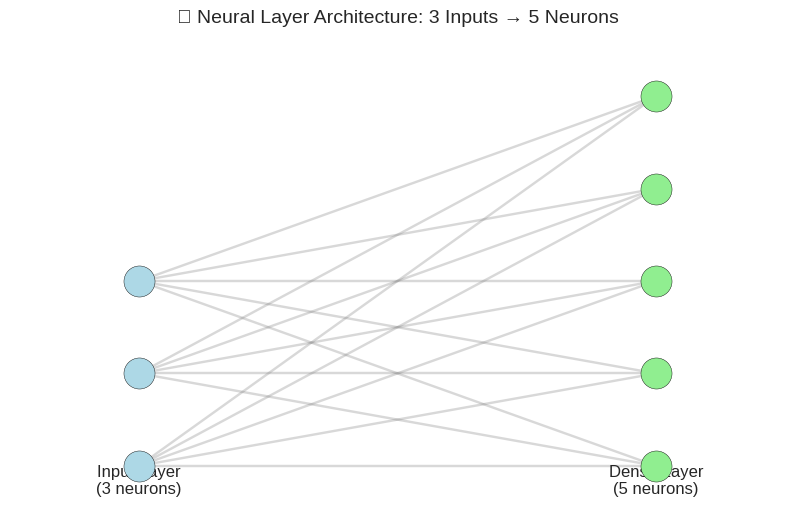

In [ ]:

# Demonstrate neural layer
print("🏗️ Neural Layer Demo:")
layer = DenseLayer(3, 5, activation='relu')  # 3 inputs, 5 neurons
X_sample = np.array([[1.0, -0.5, 2.0], [0.5, 1.5, -1.0]])  # 2 samples

output = layer.forward(X_sample)
print(f"Input shape: {X_sample.shape}")
print(f"Weight shape: {layer.W.shape}")
print(f"Output shape: {output.shape}")
print(f"\nInput:\n{X_sample}")
print(f"\nOutput (after ReLU):\n{output}")

# Visualize the layer architecture
plt.figure(figsize=(10, 6))
plt.title("🧠 Neural Layer Architecture: 3 Inputs → 5 Neurons", fontsize=14, pad=20)

# Draw neurons
for i in range(3):  # Input layer
    plt.scatter(0, i, s=500, c='lightblue', edgecolors='black', zorder=5)
    plt.text(0, i, f'x{i+1}', ha='center', va='center', fontweight='bold')
    
for j in range(5):  # Output layer
    plt.scatter(2, j, s=500, c='lightgreen', edgecolors='black', zorder=5)
    plt.text(2, j, f'a{j+1}', ha='center', va='center', fontweight='bold')
    
    # Draw connections
    for i in range(3):
        plt.plot([0, 2], [i, j], 'gray', alpha=0.3)

plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 4.5)
plt.axis('off')
plt.text(0, -0.3, 'Input Layer\n(3 neurons)', ha='center', fontsize=12)
plt.text(2, -0.3, 'Dense Layer\n(5 neurons)', ha='center', fontsize=12)
plt.show()

# Part 4: Building Multi-Layer Perceptron (MLP)

## 🏰 Architecture: Stacking Layers

### 🧩 The LEGO Tower Analogy
- Each layer is a level in the tower
- Lower layers learn simple features (edges, corners)
- Higher layers learn complex features (shapes, objects)
- Depth enables hierarchical feature learning

An MLP is simply **multiple dense layers composed together**:
$$\text{Input} \rightarrow \text{Layer}_1 \rightarrow \text{ReLU} \rightarrow \text{Layer}_2 \rightarrow \text{ReLU} \rightarrow \dots \rightarrow \text{Output Layer} \rightarrow \text{Sigmoid/Softmax}$$

In [ ]:
class MLP:
    """A complete Multi-Layer Perceptron from scratch"""
    
    def __init__(self, layer_sizes, activations=None):
        """
        Initialize MLP
        
        Args:
            layer_sizes: list of layer sizes [input, hidden1, hidden2, ..., output]
            activations: list of activations for each layer
        """
        self.layer_sizes = layer_sizes
        self.activations = activations or ['relu'] * (len(layer_sizes)-2) + ['sigmoid'] # 
        
        # Initialize layers
        self.layers = []
        for i in range(len(layer_sizes) - 1):
            layer = DenseLayer(layer_sizes[i], layer_sizes[i+1], self.activations[i])
            self.layers.append(layer)
    
    def forward(self, X):
        """Forward pass through all layers"""
        self.X = X
        current_output = X
        
        for layer in self.layers:
            current_output = layer.forward(current_output)
            
        return current_output
    
    def backward(self, dL_doutput):
        """Backward pass through all layers (backpropagation)"""
        gradients = []
        current_grad = dL_doutput
        
        # Go backwards through layers
        for layer in reversed(self.layers):
            dL_dW, dL_db, dL_dX = layer.backward(current_grad)
            gradients.append((dL_dW, dL_db))
            current_grad = dL_dX
            
        # Reverse to match layer order
        return list(reversed(gradients))
    
    def update_parameters(self, gradients, learning_rate):
        """Update all parameters using gradients"""
        for i, (dL_dW, dL_db) in enumerate(gradients):
            self.layers[i].W -= learning_rate * dL_dW
            self.layers[i].b -= learning_rate * dL_db


🏰 Multi-Layer Perceptron Demo:
Architecture: [2, 4, 3, 1]
Activations: ['relu', 'relu', 'sigmoid']
Input: [[ 1.  -0.5]]
Output: 0.4999


/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


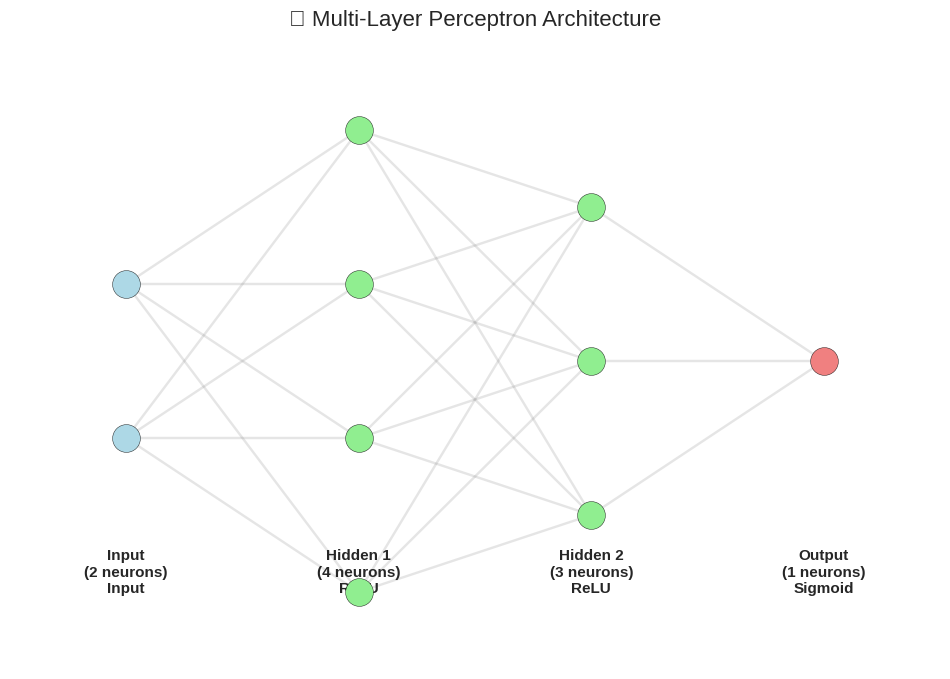

In [ ]:

# Demonstrate MLP
print("🏰 Multi-Layer Perceptron Demo:")
mlp = MLP([2, 4, 3, 1], ['relu', 'relu', 'sigmoid'])
X_sample = np.array([[1.0, -0.5]])

output = mlp.forward(X_sample)
print(f"Architecture: {mlp.layer_sizes}")
print(f"Activations: {mlp.activations}")
print(f"Input: {X_sample}")
print(f"Output: {output[0,0]:.4f}")

# Visualize the complete network
plt.figure(figsize=(12, 8))
plt.title("🏰 Multi-Layer Perceptron Architecture", fontsize=16, pad=20)

layer_names = ['Input', 'Hidden 1', 'Hidden 2', 'Output']
layer_sizes = [2, 4, 3, 1]
activations = ['Input', 'ReLU', 'ReLU', 'Sigmoid']

for layer_idx, (n_neurons, name, activation) in enumerate(zip(layer_sizes, layer_names, activations)):
    x_pos = layer_idx * 2
    
    for neuron_idx in range(n_neurons):
        y_pos = (n_neurons - 1) / 2 - neuron_idx
        
        # Color based on layer type
        if layer_idx == 0:
            color = 'lightblue'
        elif layer_idx == len(layer_sizes) - 1:
            color = 'lightcoral'
        else:
            color = 'lightgreen'
            
        plt.scatter(x_pos, y_pos, s=400, c=color, edgecolors='black', zorder=5)
        
        # Draw connections to next layer
        if layer_idx < len(layer_sizes) - 1:
            next_n_neurons = layer_sizes[layer_idx + 1]
            for next_neuron in range(next_n_neurons):
                next_y = (next_n_neurons - 1) / 2 - next_neuron
                plt.plot([x_pos, x_pos + 2], [y_pos, next_y], 'gray', alpha=0.2)
    
    plt.text(x_pos, -1.5, f'{name}\n({n_neurons} neurons)\n{activation}', 
             ha='center', fontsize=11, weight='bold')

plt.xlim(-1, 7)
plt.ylim(-2, 2)
plt.axis('off')
plt.show()

# Part 5: Complete Training System

## 🎯 Putting It All Together: Training Loop

### 🍳 The Cooking Recipe Analogy
- **Forward pass** = Following the recipe step by step
- **Loss calculation** = Tasting the food to see how good it is
- **Backward pass** = Figuring out which ingredients to adjust
- **Parameter update** = Adjusting the recipe for next time

In [ ]:
class NeuralNetworkClassifier:
    """Complete neural network classifier with training"""
    
    def __init__(self, layer_sizes, activations=None, learning_rate=0.01, batch_size=32):
        self.mlp = MLP(layer_sizes, activations)
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.loss_history = []
        self.accuracy_history = []
        self.val_loss_history = []
        self.val_accuracy_history = []
    
    def binary_cross_entropy(self, y_pred, y_true):
        """Compute binary cross-entropy loss"""
        y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def binary_cross_entropy_grad(self, y_pred, y_true):
        """Compute gradient of binary cross-entropy"""
        y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
        return (y_pred - y_true) / (y_pred * (1 - y_pred) * len(y_true))
    
    def accuracy(self, y_pred, y_true):
        """Compute classification accuracy"""
        predictions = (y_pred >= 0.5).astype(int)
        return np.mean(predictions == y_true) * 100
    
    def train(self, X_train, y_train, X_val=None, y_val=None, epochs=1000, verbose=True):
        """Train the neural network with mini-batches"""
        n_samples = X_train.shape[0]
        
        for epoch in range(epochs):
            # Mini-batch training
            indices = np.random.permutation(n_samples)
            X_shuffled = X_train[indices]
            y_shuffled = y_train[indices]
            
            for start_idx in range(0, n_samples, self.batch_size):
                end_idx = min(start_idx + self.batch_size, n_samples)
                X_batch = X_shuffled[start_idx:end_idx]
                y_batch = y_shuffled[start_idx:end_idx]
                
                # Forward pass
                y_pred = self.mlp.forward(X_batch)
                
                # Backward pass
                dL_doutput = self.binary_cross_entropy_grad(y_pred, y_batch)
                gradients = self.mlp.backward(dL_doutput)
                
                # Update parameters
                self.mlp.update_parameters(gradients, self.learning_rate)
            
            # Compute epoch metrics
            y_pred_train = self.mlp.forward(X_train)
            train_loss = self.binary_cross_entropy(y_pred_train, y_train)
            train_accuracy = self.accuracy(y_pred_train, y_train)
            
            self.loss_history.append(train_loss)
            self.accuracy_history.append(train_accuracy)
            
            # Validation metrics
            if X_val is not None and y_val is not None:
                y_pred_val = self.mlp.forward(X_val)
                val_loss = self.binary_cross_entropy(y_pred_val, y_val)
                val_accuracy = self.accuracy(y_pred_val, y_val)
                self.val_loss_history.append(val_loss)
                self.val_accuracy_history.append(val_accuracy)
            
            if verbose and (epoch % 100 == 0 or epoch == epochs - 1):
                val_info = f" | Val Loss: {val_loss:.4f} | Val Acc: {val_accuracy:.2f}%" if X_val is not None else ""
                print(f"Epoch {epoch:4d} | Loss: {train_loss:.4f} | Acc: {train_accuracy:.2f}%{val_info}")
    
    def predict(self, X):
        """Make predictions"""
        y_pred = self.mlp.forward(X)
        return (y_pred >= 0.5).astype(int)
    
    def predict_proba(self, X):
        """Predict probabilities"""
        return self.mlp.forward(X)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split

# Generate datasets
print("📊 GENERATING DATASETS...")
np.random.seed(42)

# Moons dataset
X_moons, y_moons = make_moons(n_samples=500, noise=0.1, random_state=42)
y_moons = y_moons.reshape(-1, 1)

# Circles dataset  
X_circles, y_circles = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)
y_circles = y_circles.reshape(-1, 1)

print(f"Moons dataset: X {X_moons.shape}, y {y_moons.shape}")
print(f"Circles dataset: X {X_circles.shape}, y {y_circles.shape}")

# Split into train/validation sets
X_moons_train, X_moons_val, y_moons_train, y_moons_val = train_test_split(
    X_moons, y_moons, test_size=0.2, random_state=42
)

X_circles_train, X_circles_val, y_circles_train, y_circles_val = train_test_split(
    X_circles, y_circles, test_size=0.2, random_state=42
)

print(f"\nTrain/Validation splits:")
print(f"Moons - Train: {X_moons_train.shape}, Val: {X_moons_val.shape}")
print(f"Circles - Train: {X_circles_train.shape}, Val: {X_circles_val.shape}")

📊 GENERATING DATASETS...
Moons dataset: X (500, 2), y (500, 1)
Circles dataset: X (500, 2), y (500, 1)

Train/Validation splits:
Moons - Train: (400, 2), Val: (100, 2)
Circles - Train: (400, 2), Val: (100, 2)


In [ ]:
print("\n" + "="*60)
print("🌙 TRAINING ON MOONS DATASET")
print("="*60)

# Create and train neural network for moons
nn_moons = NeuralNetworkClassifier(
    layer_sizes=[2, 16, 8, 1],  # Input: 2, Hidden: 16→8, Output: 1
    activations=['relu', 'relu', 'sigmoid'],
    learning_rate=0.1,
    batch_size=32
)

print("🧠 Neural Network Architecture for Moons:")
for i, layer in enumerate(nn_moons.mlp.layers):
    print(f"Layer {i}: {layer.W.shape[0]} → {layer.W.shape[1]} neurons ({layer.activation})")

# Train the model
nn_moons.train(
    X_moons_train, y_moons_train,
    X_val=X_moons_val, y_val=y_moons_val,
    epochs=1000,
    verbose=True
)

# Final evaluation
final_pred_moons = nn_moons.predict(X_moons_val)
final_proba_moons = nn_moons.predict_proba(X_moons_val)
final_acc_moons = nn_moons.accuracy(final_proba_moons, y_moons_val)

print(f"\n🎯 Final Moons Validation Accuracy: {final_acc_moons:.2f}%")


🌙 TRAINING ON MOONS DATASET
🧠 Neural Network Architecture for Moons:
Layer 0: 2 → 16 neurons (relu)
Layer 1: 16 → 8 neurons (relu)
Layer 2: 8 → 1 neurons (sigmoid)
Epoch    0 | Loss: 0.6921 | Acc: 61.50% | Val Loss: 0.6927 | Val Acc: 53.00%
Epoch  100 | Loss: 0.1494 | Acc: 93.50% | Val Loss: 0.1444 | Val Acc: 93.00%
Epoch  200 | Loss: 0.0105 | Acc: 99.75% | Val Loss: 0.0114 | Val Acc: 100.00%
Epoch  300 | Loss: 0.0052 | Acc: 100.00% | Val Loss: 0.0056 | Val Acc: 100.00%
Epoch  400 | Loss: 0.0037 | Acc: 100.00% | Val Loss: 0.0034 | Val Acc: 100.00%
Epoch  500 | Loss: 0.0026 | Acc: 100.00% | Val Loss: 0.0020 | Val Acc: 100.00%
Epoch  600 | Loss: 0.0029 | Acc: 100.00% | Val Loss: 0.0025 | Val Acc: 100.00%
Epoch  700 | Loss: 0.0018 | Acc: 100.00% | Val Loss: 0.0011 | Val Acc: 100.00%
Epoch  800 | Loss: 0.0017 | Acc: 100.00% | Val Loss: 0.0007 | Val Acc: 100.00%
Epoch  900 | Loss: 0.0013 | Acc: 100.00% | Val Loss: 0.0007 | Val Acc: 100.00%
Epoch  999 | Loss: 0.0012 | Acc: 100.00% | Val Los

In [ ]:
print("\n" + "="*60)
print("⭕ TRAINING ON CIRCLES DATASET") 
print("="*60)

# Create and train neural network for circles
nn_circles = NeuralNetworkClassifier(
    layer_sizes=[2, 20, 10, 1],  # Slightly different architecture
    activations=['relu', 'relu', 'sigmoid'],
    learning_rate=0.1, 
    batch_size=32
)

print("🧠 Neural Network Architecture for Circles:")
for i, layer in enumerate(nn_circles.mlp.layers):
    print(f"Layer {i}: {layer.W.shape[0]} → {layer.W.shape[1]} neurons ({layer.activation})")

# Train the model
nn_circles.train(
    X_circles_train, y_circles_train,
    X_val=X_circles_val, y_val=y_circles_val, 
    epochs=1000,
    verbose=True
)

# Final evaluation
final_pred_circles = nn_circles.predict(X_circles_val)
final_proba_circles = nn_circles.predict_proba(X_circles_val)
final_acc_circles = nn_circles.accuracy(final_proba_circles, y_circles_val)

print(f"\n🎯 Final Circles Validation Accuracy: {final_acc_circles:.2f}%")


⭕ TRAINING ON CIRCLES DATASET
🧠 Neural Network Architecture for Circles:
Layer 0: 2 → 20 neurons (relu)
Layer 1: 20 → 10 neurons (relu)
Layer 2: 10 → 1 neurons (sigmoid)
Epoch    0 | Loss: 0.6936 | Acc: 51.75% | Val Loss: 0.6956 | Val Acc: 43.00%
Epoch  100 | Loss: 0.1097 | Acc: 99.25% | Val Loss: 0.1166 | Val Acc: 98.00%
Epoch  200 | Loss: 0.0195 | Acc: 99.50% | Val Loss: 0.0337 | Val Acc: 98.00%
Epoch  300 | Loss: 0.0154 | Acc: 99.50% | Val Loss: 0.0183 | Val Acc: 99.00%
Epoch  400 | Loss: 0.0171 | Acc: 99.50% | Val Loss: 0.0593 | Val Acc: 98.00%
Epoch  500 | Loss: 0.0078 | Acc: 100.00% | Val Loss: 0.0269 | Val Acc: 98.00%
Epoch  600 | Loss: 0.0073 | Acc: 99.75% | Val Loss: 0.0262 | Val Acc: 99.00%
Epoch  700 | Loss: 0.0062 | Acc: 99.75% | Val Loss: 0.0321 | Val Acc: 99.00%
Epoch  800 | Loss: 0.0365 | Acc: 99.00% | Val Loss: 0.0409 | Val Acc: 98.00%
Epoch  900 | Loss: 0.0185 | Acc: 99.00% | Val Loss: 0.0405 | Val Acc: 98.00%
Epoch  999 | Loss: 0.0062 | Acc: 99.50% | Val Loss: 0.0620

## 📊 Visualizing Training Progress & Overfitting

/tmp/ipykernel_392068/2771825583.py:25: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_392068/2771825583.py:25: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


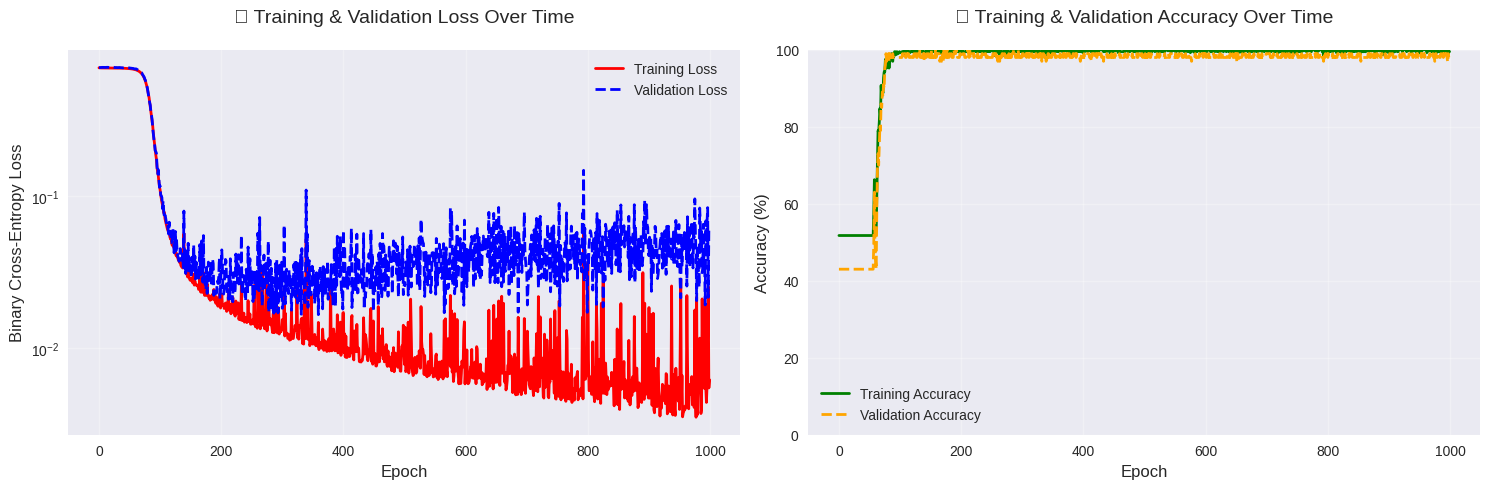


🔍 Training Analysis:
• Initial Loss: 0.6936
• Final Loss: 0.0062
• Improvement: 0.6874
• Final Training Accuracy: 99.50%
• Final Validation Accuracy: 98.00%
• Generalization Gap: 1.50%
  ✅ Good generalization!


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loss curve
axes[0].plot(nn_circles.loss_history, color='red', linewidth=2, label='Training Loss')
if nn_circles.val_loss_history:
    axes[0].plot(nn_circles.val_loss_history, color='blue', linewidth=2, label='Validation Loss', linestyle='--')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Binary Cross-Entropy Loss', fontsize=12)
axes[0].set_title('📉 Training & Validation Loss Over Time', fontsize=14, pad=20)
axes[0].grid(True, alpha=0.3)
axes[0].set_yscale('log')  # Log scale for better visualization
axes[0].legend()

# Accuracy curve
axes[1].plot(nn_circles.accuracy_history, color='green', linewidth=2, label='Training Accuracy')
if nn_circles.val_accuracy_history:
    axes[1].plot(nn_circles.val_accuracy_history, color='orange', linewidth=2, label='Validation Accuracy', linestyle='--')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy (%)', fontsize=12)
axes[1].set_title('📈 Training & Validation Accuracy Over Time', fontsize=14, pad=20)
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(0, 100)
axes[1].legend()

plt.tight_layout()
plt.show()

print("\n🔍 Training Analysis:")
print(f"• Initial Loss: {nn_circles.loss_history[0]:.4f}")
print(f"• Final Loss: {nn_circles.loss_history[-1]:.4f}")
print(f"• Improvement: {nn_circles.loss_history[0] - nn_circles.loss_history[-1]:.4f}")
print(f"• Final Training Accuracy: {nn_circles.accuracy_history[-1]:.2f}%")
if nn_circles.val_accuracy_history:
    print(f"• Final Validation Accuracy: {nn_circles.val_accuracy_history[-1]:.2f}%")
    generalization_gap = nn_circles.accuracy_history[-1] - nn_circles.val_accuracy_history[-1]
    print(f"• Generalization Gap: {generalization_gap:.2f}%")
    if generalization_gap > 5:
        print("  ⚠️  Potential overfitting detected!")
    else:
        print("  ✅ Good generalization!")

## 🎨 Visualizing Decision Boundaries

/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


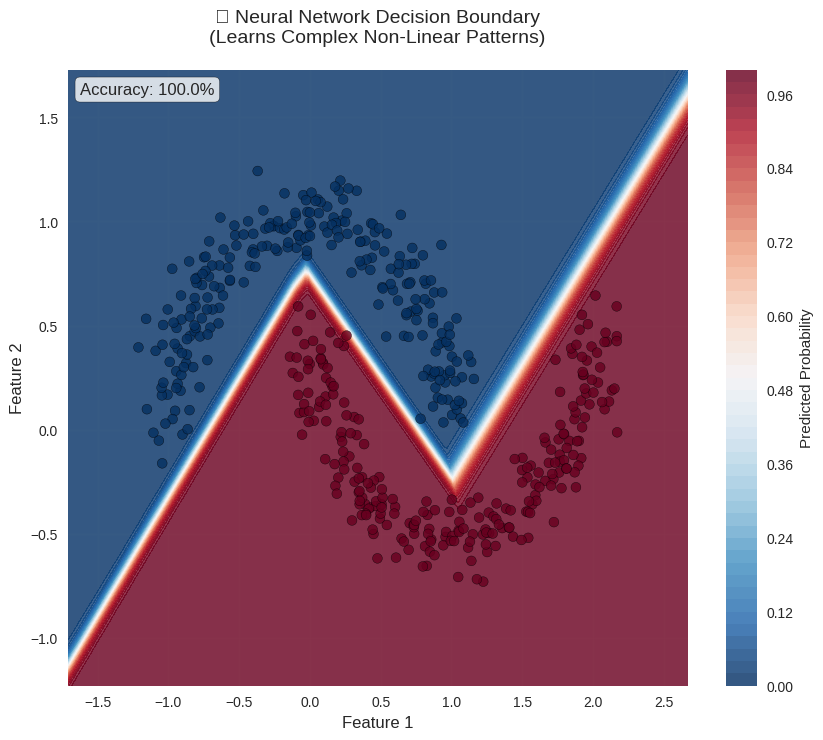

In [ ]:
def plot_decision_boundary(model, X, y, title):
    """Plot decision boundary of neural network"""
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict probabilities
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    
    # Plot decision boundary
    contour = plt.contourf(xx, yy, Z, alpha=0.8, cmap='RdBu_r', levels=50)
    plt.colorbar(contour, label='Predicted Probability')
    
    # Plot data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu_r', 
                         edgecolors='black', s=50, alpha=0.8)
    
    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.title(title, fontsize=14, pad=20)
    plt.grid(True, alpha=0.3)
    
    # Add accuracy to plot
    accuracy = model.accuracy(model.predict_proba(X), y.reshape(-1, 1))
    plt.text(0.02, 0.98, f'Accuracy: {accuracy:.1f}%', 
             transform=plt.gca().transAxes, fontsize=12, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
             verticalalignment='top')
    
    plt.show()

# Plot decision boundary
plot_decision_boundary(nn_moons, X_moons, y_moons, 
                      "🎯 Neural Network Decision Boundary\n(Learns Complex Non-Linear Patterns)")

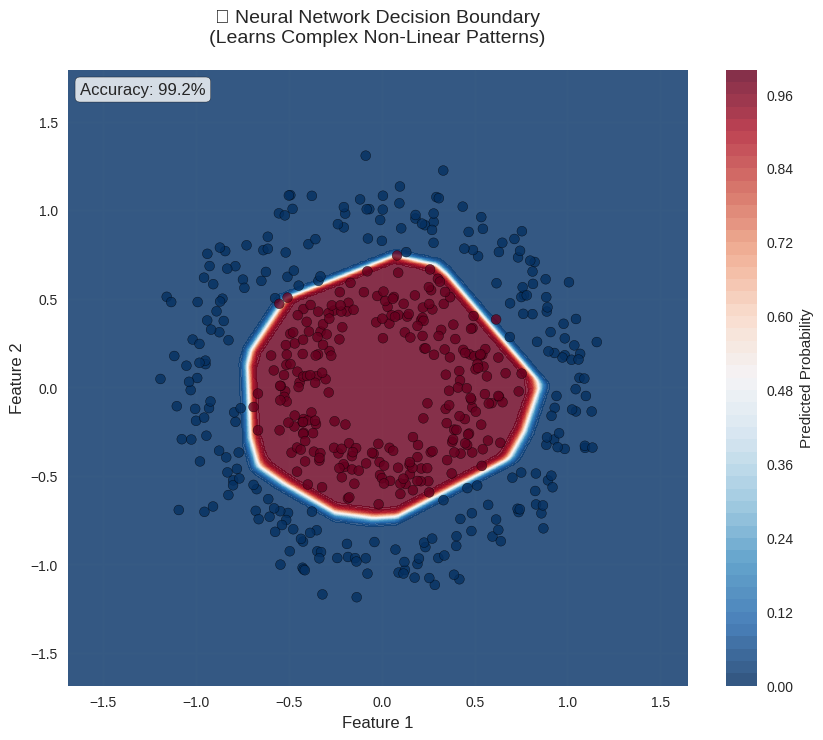

In [ ]:
# Plot decision boundary
plot_decision_boundary(nn_circles, X_circles, y_circles, 
                      "🎯 Neural Network Decision Boundary\n(Learns Complex Non-Linear Patterns)")

# Part 6: Advanced Concepts & Best Practices

## 🧪 Experiment: Architecture Comparison

🧪 Architecture Comparison Experiment:

Training Small network: [2, 5, 1]
✅ Train Accuracy: 87.50%
✅ Val Accuracy: 85.00%
📊 Parameters: 21

Training Medium network: [2, 10, 5, 1]
✅ Train Accuracy: 89.25%
✅ Val Accuracy: 90.00%
📊 Parameters: 91

Training Large network: [2, 20, 10, 5, 1]
✅ Train Accuracy: 87.50%
✅ Val Accuracy: 89.00%
📊 Parameters: 331

Training Wide network: [2, 50, 1]
✅ Train Accuracy: 100.00%
✅ Val Accuracy: 100.00%
📊 Parameters: 201

📊 ARCHITECTURE COMPARISON RESULTS

Architecture Layers          Parameters   Train Acc  Val Acc    Gap     
--------------------------------------------------------------------------------
Small        [2, 5, 1]       21           87.50     % 85.00     % 2.50% ✅
Medium       [2, 10, 5, 1]   91           89.25     % 90.00     % -0.75% ✅
Large        [2, 20, 10, 5, 1] 331          87.50     % 89.00     % -1.50% ✅
Wide         [2, 50, 1]      201          100.00    % 100.00    % 0.00% ✅


/tmp/ipykernel_392068/4047974736.py:87: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


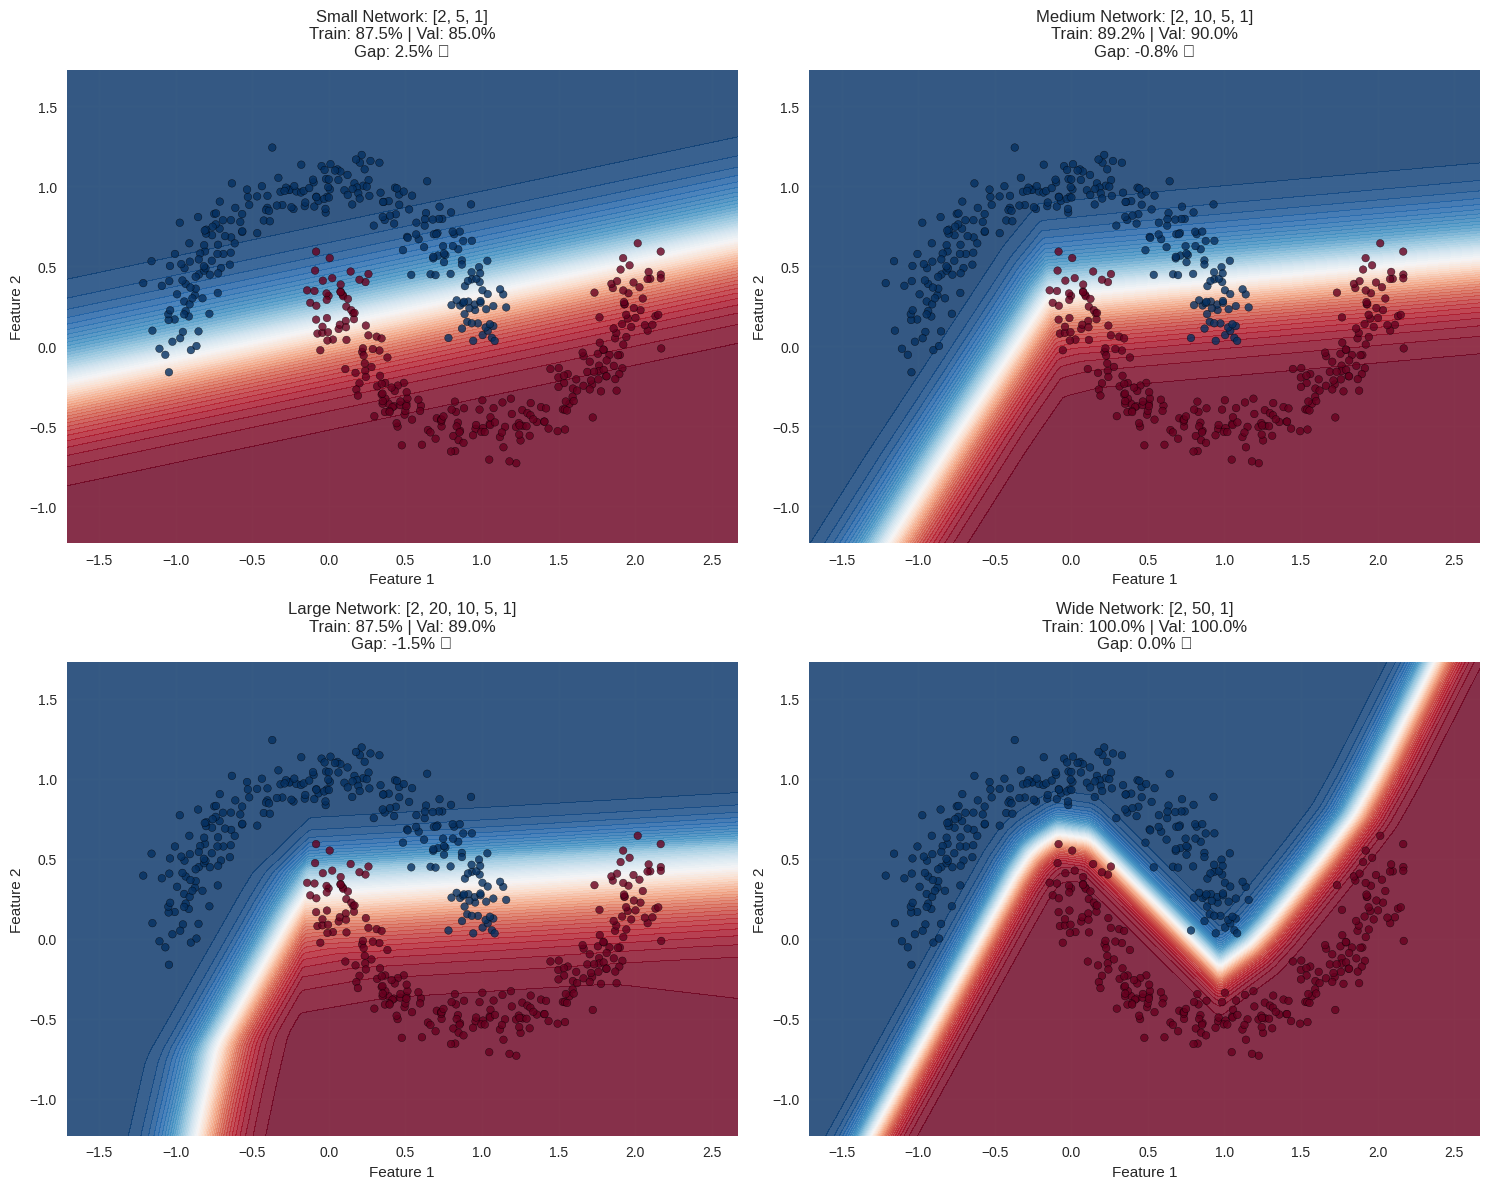

In [ ]:
# Compare different architectures
architectures = {
    "Small": [2, 5, 1],
    "Medium": [2, 10, 5, 1], 
    "Large": [2, 20, 10, 5, 1],
    "Wide": [2, 50, 1]
}

results = {}

print("🧪 Architecture Comparison Experiment:")
print("=" * 60)

for name, arch in architectures.items():
    print(f"\nTraining {name} network: {arch}")
    
    model = NeuralNetworkClassifier(
        layer_sizes=arch,
        activations=['relu'] * (len(arch)-2) + ['sigmoid'],
        learning_rate=0.1,
        batch_size=32
    )
    
    model.train(X_moons_train, y_moons_train,X_moons_val, y_moons_val, epochs=500, verbose=False)
    
    final_train_accuracy = model.accuracy_history[-1]
    final_val_accuracy = model.val_accuracy_history[-1] if model.val_accuracy_history else final_train_accuracy
    
    results[name] = {
        'train_accuracy': final_train_accuracy,
        'val_accuracy': final_val_accuracy,
        'parameters': sum((arch[i] * arch[i+1] + arch[i+1]) for i in range(len(arch)-1)),
        'model': model
    }
    
    print(f"✅ Train Accuracy: {final_train_accuracy:.2f}%")
    print(f"✅ Val Accuracy: {final_val_accuracy:.2f}%")
    print(f"📊 Parameters: {results[name]['parameters']}")

# Display comparison
print("\n" + "=" * 60)
print("📊 ARCHITECTURE COMPARISON RESULTS")
print("=" * 60)
print(f"\n{'Architecture':<12} {'Layers':<15} {'Parameters':<12} {'Train Acc':<10} {'Val Acc':<10} {'Gap':<8}")
print("-" * 80)

for name, result in results.items():
    layers = architectures[name]
    gap = result['train_accuracy'] - result['val_accuracy']
    gap_indicator = "⚠️" if gap > 5 else "✅"
    
    print(f"{name:<12} {str(layers):<15} {result['parameters']:<12} {result['train_accuracy']:<10.2f}% {result['val_accuracy']:<10.2f}% {gap:.2f}% {gap_indicator}")

print("=" * 80)

# Visualize decision boundaries for all architectures
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, (name, result) in enumerate(results.items()):
    model = result['model']
    
    # Create meshgrid
    h = 0.02
    x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
    y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    contour = axes[idx].contourf(xx, yy, Z, alpha=0.8, cmap='RdBu_r', levels=50)
    axes[idx].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='RdBu_r', 
                     edgecolors='black', s=30, alpha=0.8)
    
    gap = result['train_accuracy'] - result['val_accuracy']
    gap_text = f"Gap: {gap:.1f}% {'⚠️' if gap > 5 else '✅'}"
    
    axes[idx].set_title(f'{name} Network: {architectures[name]}\nTrain: {result["train_accuracy"]:.1f}% | Val: {result["val_accuracy"]:.1f}%\n{gap_text}', 
                       fontsize=12, pad=10)
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 🎯 Summary & Key Takeaways

## 🏆 What We've Built From Scratch:

1. **🧮 Mathematical Foundation**: Differentiable functions, gradients, chain rule
2. **🧠 Single Neuron**: Basic computational unit with activation
3. **🏗️ Neural Layer**: Multiple neurons in parallel  
4. **🏰 Multi-Layer Perceptron**: Composed layers for complex functions
5. **🎯 Complete Training System**: Forward pass, loss, backward pass, optimization
6. **📊 Evaluation Framework**: Metrics, visualization, analysis

## 🔑 Key Insights:

- **Deep Learning = Differentiable Function Composition + Gradient Descent**
- **Activation Functions** introduce non-linearity enabling complex pattern learning
- **Backpropagation** efficiently computes gradients using chain rule
- **Universal Approximation** theorem guarantees neural networks can learn any continuous function
- **Architecture Matters**: Depth vs width trade-offs
- **Generalization**: Train/validation split helps detect overfitting

## 🚀 Next Steps:

This foundation enables understanding of all modern deep learning:
- Convolutional Neural Networks (CNNs) for images
- Recurrent Neural Networks (RNNs) for sequences  
- Transformers for text and beyond
- Reinforcement Learning
- Generative Models

**You now understand the core mathematics and implementation of deep learning!** 🎉

In [ ]:
# Final inspirational summary
print("\n" + "✨" * 60)
print("🎉 CONGRATULATIONS! You've built deep learning from first principles!")
print("💪 You understand the mathematics, implementation, and intuition")
print("🚀 Ready to tackle CNNs, RNNs, Transformers, and beyond!")
print("✨" * 60)

# Display key formulas
print("\n🔑 KEY FORMULAS MASTERED:")
print("• Forward Pass: a = σ(Wx + b)")
print("• Chain Rule: ∂L/∂W = ∂L/∂a · ∂a/∂z · ∂z/∂W") 
print("• Gradient Descent: W = W - η · ∂L/∂W")
print("• Universal Approximation: f(x) ≈ NN(x) for any continuous f")

print("\n🌟 YOU ARE NOW A DEEP LEARNING PRACTITIONER! 🌟")